In [11]:
# Code to reproduce figure 4b,4c in Forlin, Mebrahtu et al

# Boxplot - Figure 4 b)

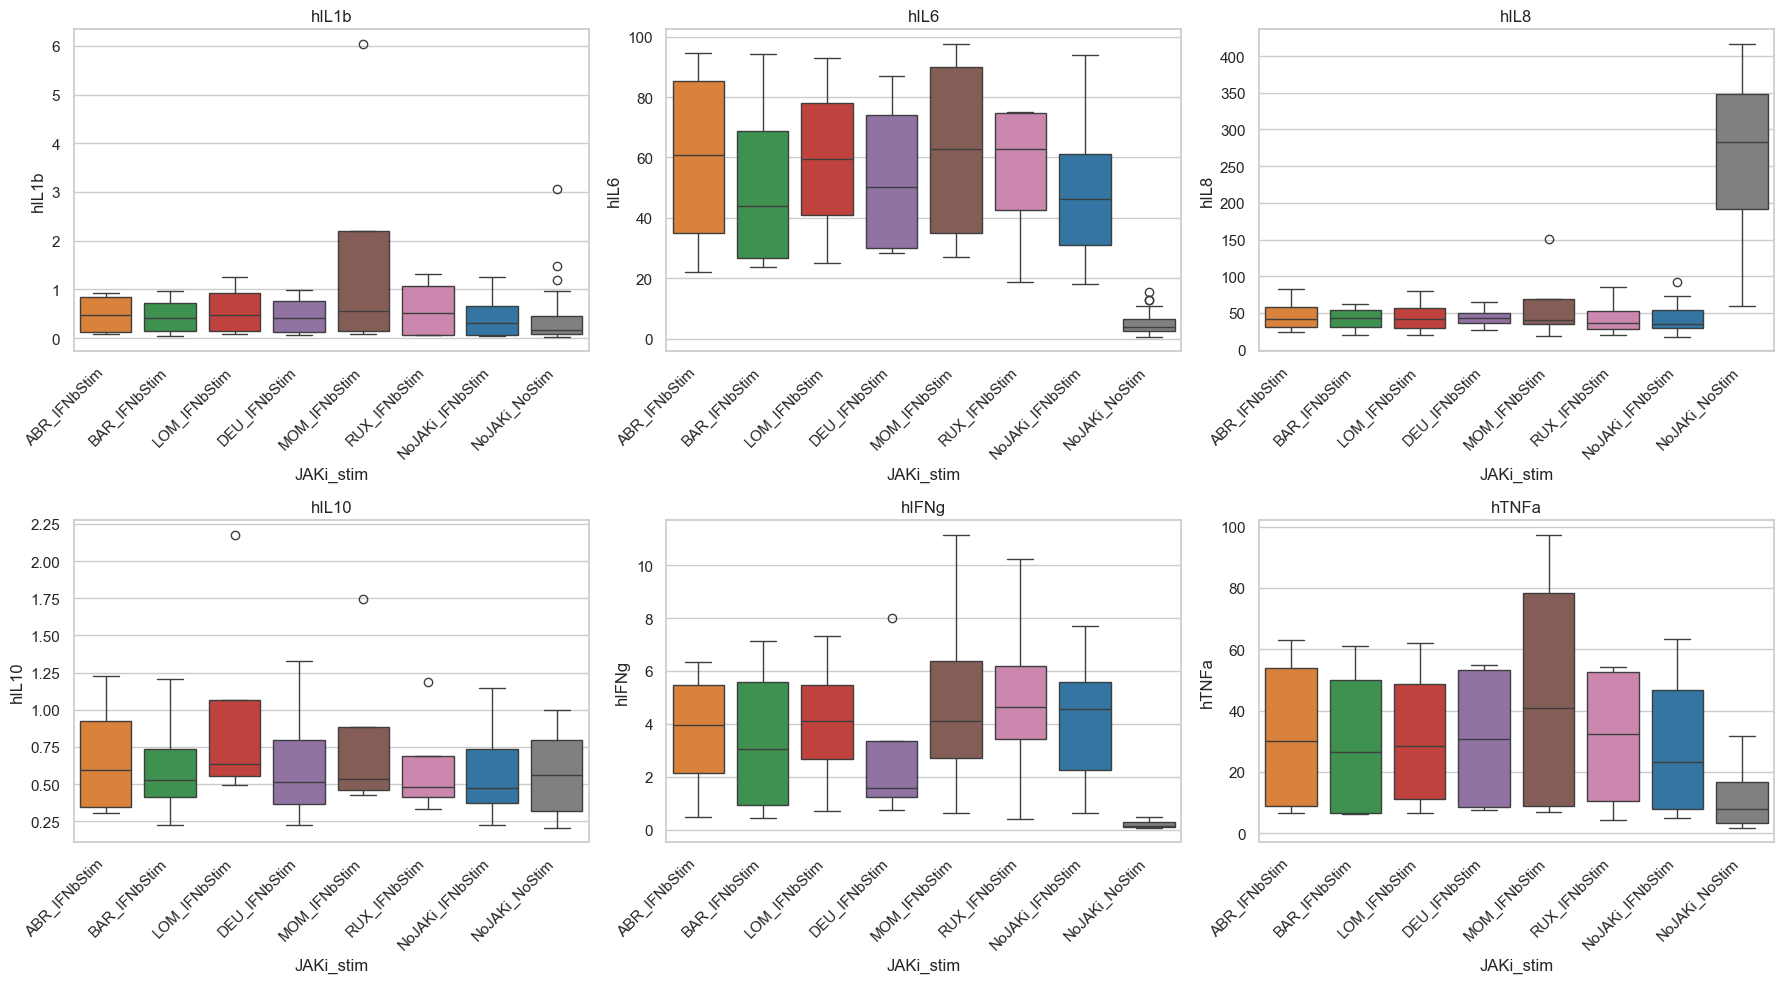

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

df_box = pd.read_csv('./data/Figure4_Dataframe_SIMOA_JAKiCytokineprofiling.csv', index_col = [0])
cytokines = ['hIL1b', 'hIL6', 'hIL8', 'hIL10','hIFNg', 'hTNFa']


custom_colors = {
    'ABR_IFNbStim': '#f27f21',
    'BAR_IFNbStim': '#319f48',
    'LOM_IFNbStim': '#d52d29',
    'DEU_IFNbStim': '#926aab',
    'MOM_IFNbStim': '#8c594e',
    'RUX_IFNbStim': '#d77bb0',
    'NoJAKi_IFNbStim': '#2278b5',
    'NoJAKi_NoStim': '#808080'
}


custom_colors_rgba = {
    k: mcolors.to_rgba(v, alpha=0.75) for k, v in custom_colors.items()
}

df_box['JAKi_stim'] = pd.Categorical(df_box['JAKi_stim'], categories=custom_colors.keys(), ordered=True)

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, cytokine in enumerate(cytokines):
    ax = axes[i]
    sns.boxplot(
        data=df_box,
        x='JAKi_stim',
        y=cytokine,
        palette=custom_colors,
        ax=ax
    )
    ax.set_title(cytokine)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()


In [78]:
# Load the csv file
df = pd.read_csv("./data/Figure4_Dataframe_SIMOA_JAKiCytokineprofiling.csv")

cytokine_columns = [col for col in df.columns[5:-1]]
df[cytokine_columns] = df[cytokine_columns].replace("Under", np.nan)
df[cytokine_columns] = df[cytokine_columns].apply(pd.to_numeric)

df_6h["Condition"] = df_6h["JAKi"] + " + " + df_6h["Stimulation"]

significance_results = []
for cytokine in cytokine_columns:
    ref_df = df_6h[
        (df_6h["JAKi"] == "NoJAKi") & (df_6h["Stimulation"] == "IFNbStim")][["Donor", cytokine]].rename(columns={cytokine: "Reference"})
    for jak in df_6h["JAKi"].unique():
        if jak == "NoJAKi":
            continue
        test_df = df_6h[
            (df_6h["JAKi"] == jak) & (df_6h["Stimulation"] == "IFNbStim")][["Donor", cytokine]].rename(columns={cytokine: "Test"})
        merged = pd.merge(ref_df, test_df, on="Donor")
        if len(merged) >= 3:
            stat, p = wilcoxon(merged["Test"], merged["Reference"], alternative="two-sided") #scipy.stats.ttest_ind(merged["Test"], merged["Reference"])#
            sig = "**" if p < 0.01 else "*" if p < 0.05 else "ns"
            significance_results.append((cytokine, f"{jak} + IFNbStim", p, sig))
            
significance_results = pd.DataFrame(significance_results, columns = ['Cytokine', 'Condition', 'pvalue', 'significance'])


# PCA - Figure 4 c)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cyto = pd.read_csv('./data/Figure4_Dataframe_SIMOA_JAKiCytokineprofiling.csv', index_col = [0])
cytokines = ['hIL1b', 'hIFNg','hTNFa', 'hIL6', 'hIL10', 'hIL8']
cytokines_names = ['IL1b', 'IFNγ', 'TNFα', 'IL6', 'IL10', 'IL8']

df_clean = cyto.copy()
df_clean[cytokines] = df_clean[cytokines].replace("Under", 0).astype(float)

tokeep = ['JAKi', 'Donor', 'Time', 'JAKi_stim'] + cytokines
df_clean = df_clean[tokeep]

grouped = df_clean.groupby("JAKi_stim")[cytokines].median()


In [4]:

scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(grouped)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_matrix)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['JAKi_stim'] = grouped.index

loadings = pd.DataFrame(pca.components_.T, columns=["PC1_loading", "PC2_loading"], index=cytokines)
loadings.index = cytokines_names


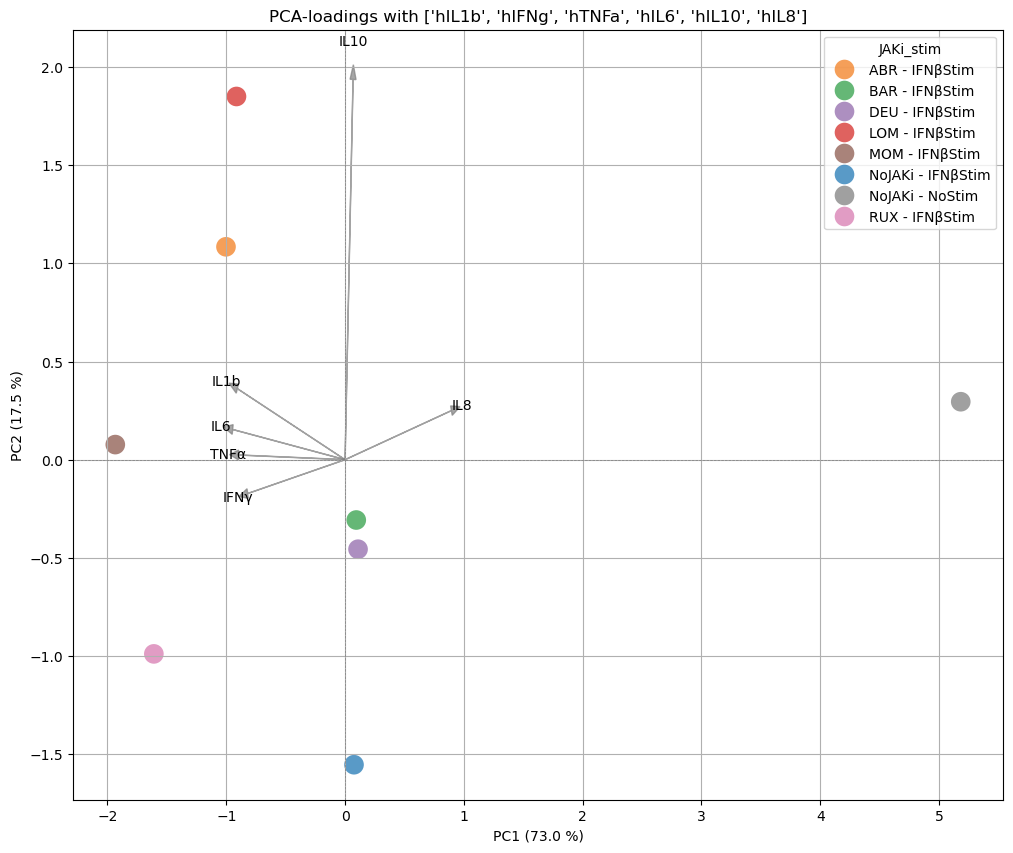

In [5]:
custom_colors = {
    'ABR - IFNβStim': '#f27f21',
    'BAR - IFNβStim': '#319f48',
    'LOM - IFNβStim': '#d52d29',
    'DEU - IFNβStim': '#926aab',
    'MOM - IFNβStim': '#8c594e',
    'RUX - IFNβStim': '#d77bb0',
    'NoJAKi - IFNβStim': '#2278b5',
    'NoJAKi - NoStim': '#808080'
}

pca_df['JAKi_stim'] = pca_df['JAKi_stim'].replace({
    'ABR_IFNbStim': 'ABR - IFNβStim',
    'BAR_IFNbStim': 'BAR - IFNβStim',
    'LOM_IFNbStim': 'LOM - IFNβStim',
    'DEU_IFNbStim': 'DEU - IFNβStim',
    'MOM_IFNbStim': 'MOM - IFNβStim',
    'RUX_IFNbStim': 'RUX - IFNβStim',
    'NoJAKi_IFNbStim': 'NoJAKi - IFNβStim',
    'NoJAKi_NoStim': 'NoJAKi - NoStim'
})


plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='JAKi_stim',
    palette=custom_colors,
    s=200,
    alpha=0.75,
    edgecolor='none'  
)

for i in range(len(loadings)):
    plt.arrow(0, 0, loadings.iloc[i, 0]*2, loadings.iloc[i, 1]*2,
              color='gray', alpha=0.7, head_width=0.05)
    plt.text(loadings.iloc[i, 0]*2.2, loadings.iloc[i, 1]*2.2,
             loadings.index[i], color='black', ha='center', va='center')

plt.title(f"PCA-loadings with {cytokines}")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f} %)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)